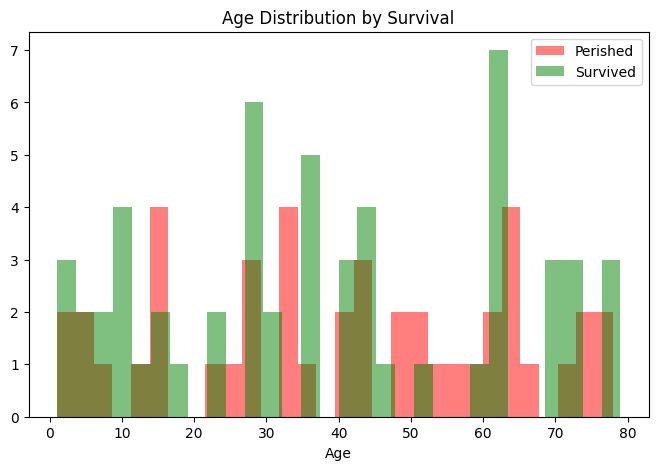

In [5]:
# 核心概念：Matplotlib 的“解剖学”

# 在写代码之前，必须理解 Matplotlib 的层级结构。很多人觉得它难学，是因为混淆了 Figure 和 Axes。
# Figure (画布)：最顶层的容器，包含所有的绘图元素。
# Axes (坐标系/子图)：真正的“画板”。一个 Figure 可以包含多个 Axes。
# Axis (坐标轴)：负责刻度、标签等。

# 两种编程接口

# 面向对象接口 (推荐)
# 通过创建 fig 和 ax 对象来操作。这是处理复杂布局、多子图时的最佳实践。

import matplotlib.pyplot as plt
import pandas as pd

# 假设 df 已经被定义并包含了所需的 Titanic 数据
# 这里我们创建一些模拟数据以便演示
import numpy as np
np.random.seed(42)
df = pd.DataFrame({
    'Survived': np.random.choice([0, 1], size=100),
    'Age': np.random.randint(1, 80, size=100)
})

fig, ax = plt.subplots(figsize=(8, 5))

# 筛选数据：活下来的年龄 vs 没活下来的年龄
age_survived = df[df['Survived'] == 1]['Age']
age_perished = df[df['Survived'] == 0]['Age']

# 绘图：bins=30 代表把年龄分成 30 个区间
ax.hist(age_perished, bins=30, alpha=0.5, label='Perished', color='red')
ax.hist(age_survived, bins=30, alpha=0.5, label='Survived', color='green')

ax.set_title('Age Distribution by Survival')
ax.set_xlabel('Age')
ax.legend() # 显示右上角的标签

plt.show()


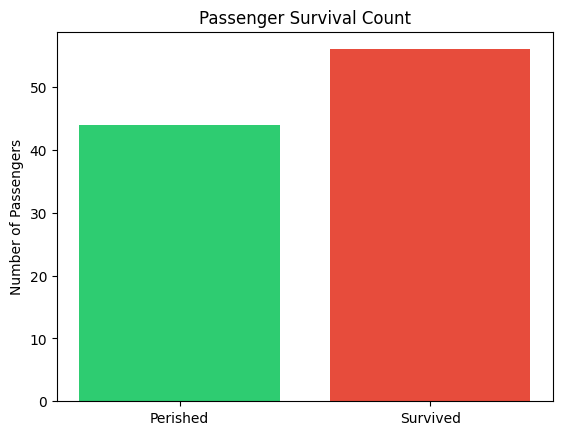

In [6]:
# 准备数据：对 Survived 列计数
survival_counts = df['Survived'].value_counts()

# 创建画布
fig, ax = plt.subplots()

# 绘图：x轴是 [0, 1]，y轴是对应的人数
ax.bar(survival_counts.index, survival_counts.values, color=['#e74c3c', '#2ecc71'])

# 定制细节
ax.set_xticks([0, 1])
ax.set_xticklabels(['Perished', 'Survived']) # 将 0/1 换成文字
ax.set_title('Passenger Survival Count')
ax.set_ylabel('Number of Passengers')

plt.show()

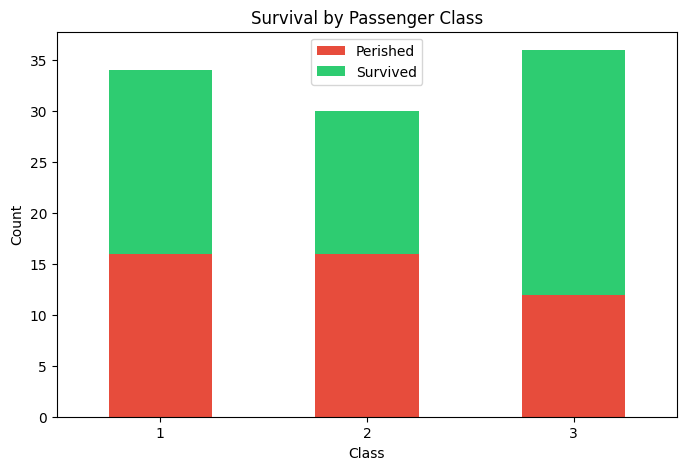

In [9]:
# 准备数据：按 Pclass 和 Survived 分组计数，并展开成表格
# 首先检查数据中是否有Pclass列，如果没有则创建示例数据
if 'Pclass' not in df.columns:
    import numpy as np
    # 为现有数据添加Pclass列作为示例
    df['Pclass'] = np.random.choice([1, 2, 3], size=len(df))

class_survived = df.groupby(['Pclass', 'Survived']).size().unstack()

# 绘图：stacked=True 代表堆叠柱状图
ax = class_survived.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'], figsize=(8, 5))

plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0) # 让横坐标的字横着写，不要斜着

# 修正：使用正确的图例显示方法
plt.legend(['Perished', 'Survived'])  # 或者使用 ax.legend(['Perished', 'Survived'])

plt.show()